### 1. Introduction

In today's competitive energy market, accurately understanding customer perceptions across multiple service dimensions is essential for companies seeking to enhance their market positioning.

This notebook explores a dataset contained in **`positioning.xlsx`**, which includes customer ratings for three prominent energy companies: **A2A**, **ENEL**, and **OCTOPUS ENERGY**. The ratings cover several key dimensions that are central to customer decision-making when selecting an energy provider:

- **Popularity:** Indicates brand awareness and market influence based on customer perception.
- **Sustainability:** Measures the commitment to environmentally friendly practices.
- **Pricing:** Assesses customer perceptions of cost competitiveness.
- **Ease and Speed of Initial Activation:** Evaluates how straightforward and rapid the process of beginning service is.
- **Clarity of the Contract:** Looks at how well the terms and conditions are communicated.
- **User-friendly App and Online Platform:** Reviews the quality of digital services provided to customers.

---




## 2. Importing Libraries and Reading the Data
In this section, we import the necessary Python libraries and read the Excel file `positioning.xlsx` into a pandas DataFrame.

In [6]:
import pandas as pd
import numpy as np

In [7]:
url = "https://raw.githubusercontent.com/Valeria-Riccardo/market-analytics-datasets/main/Positioning.xlsx"
df=pd.read_excel(url)
df.head()

,ID,Company,Popularity,Sustainability,Pricing,Easy and speed of initial activation,Clarity of the contract,User-friendly app and online platform
0,1,A2A,1.0,1.0,1.0,1.0,1.0,1.0
1,1,ENEL,4.0,4.0,4.0,4.0,4.0,4.0
2,1,OCTOPUS ENERGY,1.0,1.0,1.0,1.0,1.0,1.0
3,2,A2A,1.0,1.0,1.0,1.0,1.0,5.0
4,2,ENEL,1.0,1.0,1.0,1.0,1.0,1.0


## 3. Checking Missing Values
We need to understand if our dataset has any missing (NaN) values. The `isnull().sum()` call will give us the total number of missing values in each column.


In [8]:
df.isnull().sum()

ID                                         0
Company                                    0
Popularity                                18
Sustainability                            18
Pricing                                   18
Easy and speed of initial activation      18
Clarity of the contract                   18
 User-friendly app and online platform    18
dtype: int64

## 4. Handling Missing Data
Let's drop any rows with missing values. (Alternatively, you might decide to fill or impute them, but for this example, we will use `dropna()`.)


In [9]:
df=df.dropna()

## 5. Renaming or Confirming Column Names
Here we ensure the column names are consistent and user-friendly. We assign a new list of column names if needed.
[link text](https://)

In [10]:
df.columns=["ID","Company","Popularity",'Sustainability', 'Pricing',
       'Easy and speed of initial activation', 'Clarity of the contract',
       'User-friendly app and online platform']

In [11]:
df.describe()

,ID,Popularity,Sustainability,Pricing,Easy and speed of initial activation,Clarity of the contract,User-friendly app and online platform
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,43.292683,2.524390,1.991870,1.910569,2.036585,1.930894,1.967480
std,25.455117,1.691942,1.290442,1.195284,1.328910,1.238540,1.290056
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,43.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,88.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 6.Exploring Distributions of Key Rating Dimensions

To better understand how ratings are distributed for each category (Popularity, Sustainability, Pricing, etc.), we can create a series of histograms. This approach allows us to see at a glance where the bulk of the scores lie—whether they cluster around 1, spread evenly, or peak at 5. Understanding these distributions helps us identify areas where respondents are more polarized or more uniform in their feedback.


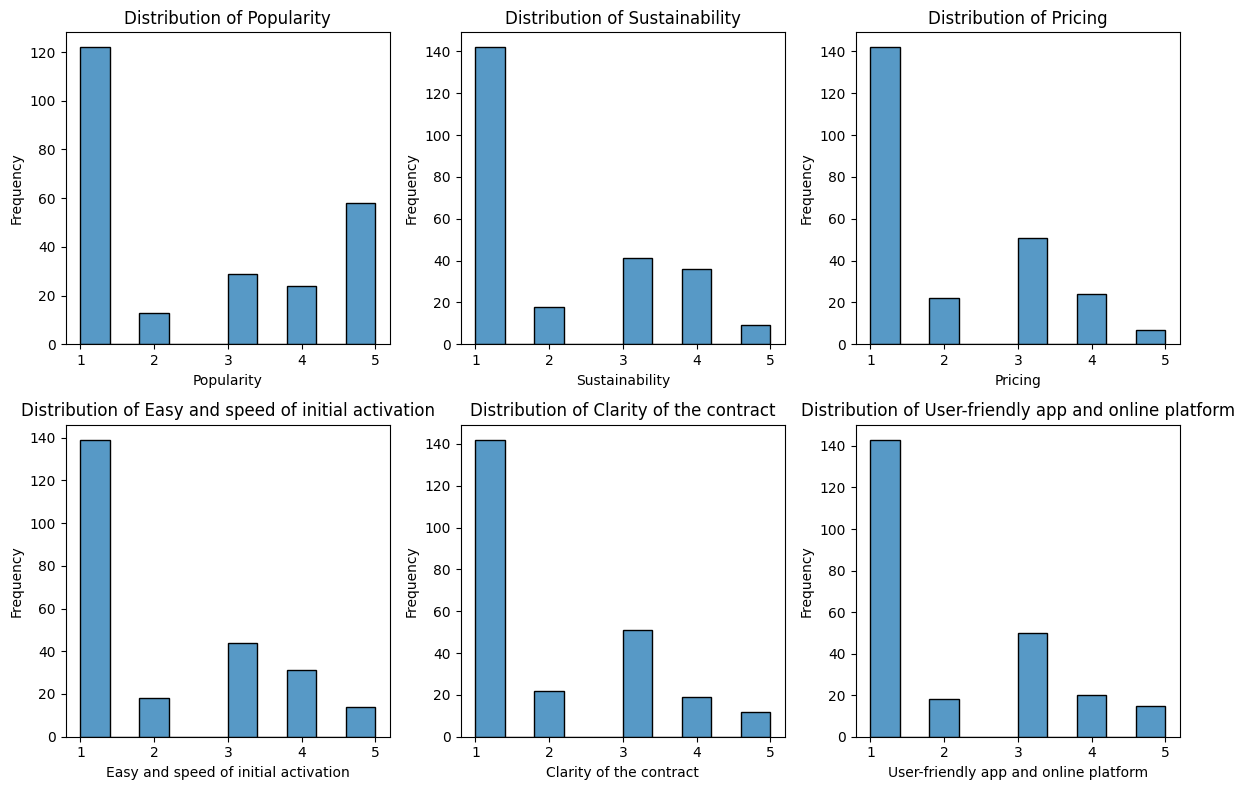

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns for distribution plot
columns = ["Popularity", "Sustainability", "Pricing",
           "Easy and speed of initial activation", "Clarity of the contract",
           "User-friendly app and online platform"]

# Set up the figure
plt.figure(figsize=(12, 8))

# Loop through columns and create subplots
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # Arrange in 2 rows, 3 columns
    sns.histplot(df[col], bins=10)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Interpretation:**
- From these histograms, we can immediately see if a certain rating category is heavily skewed toward lower scores (e.g., a lot of 1’s and 2’s) or higher scores (4’s and 5’s).
- Such patterns hint at areas where users seem most and least satisfied. For instance, if “Clarity of the contract” is predominantly scored as 1, customers might be frequently confused or dissatisfied with their contract details.
- These distributions also guide further analysis. For instance, if a category exhibits a strong bimodal pattern (peaks at both 1 and 5), we may suspect highly polarized user opinions and look for possible reasons behind that split.



## 7.Comparing Distributions by Company



We’ve already taken a look at the overall distributions for each rating category, but those plots combined data from all companies. Now, let’s break them out by individual company using Seaborn’s `FacetGrid`. This approach will generate side-by-side histograms for each numeric rating (e.g., Popularity, Pricing) across A2A, ENEL, and OCTOPUS ENERGY. By comparing these faceted plots, we can quickly spot which ratings are most common for each company and identify any striking differences between them.



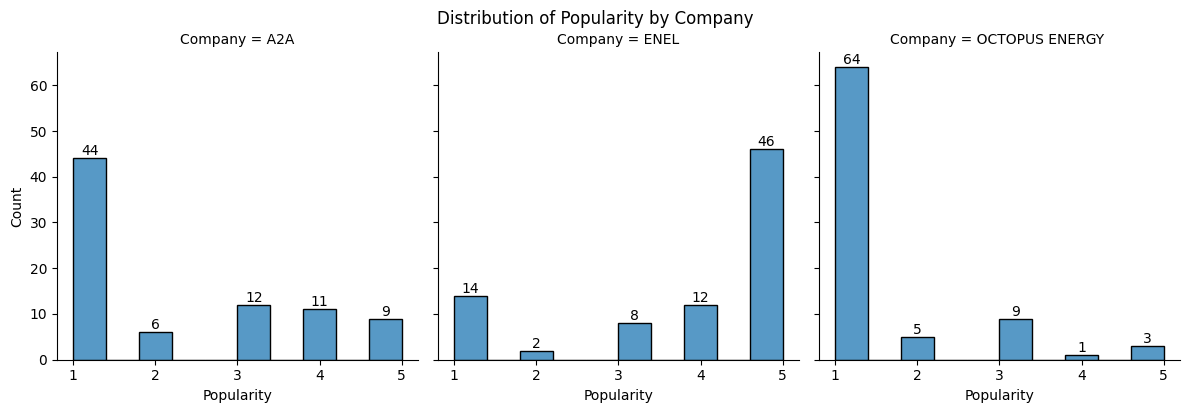

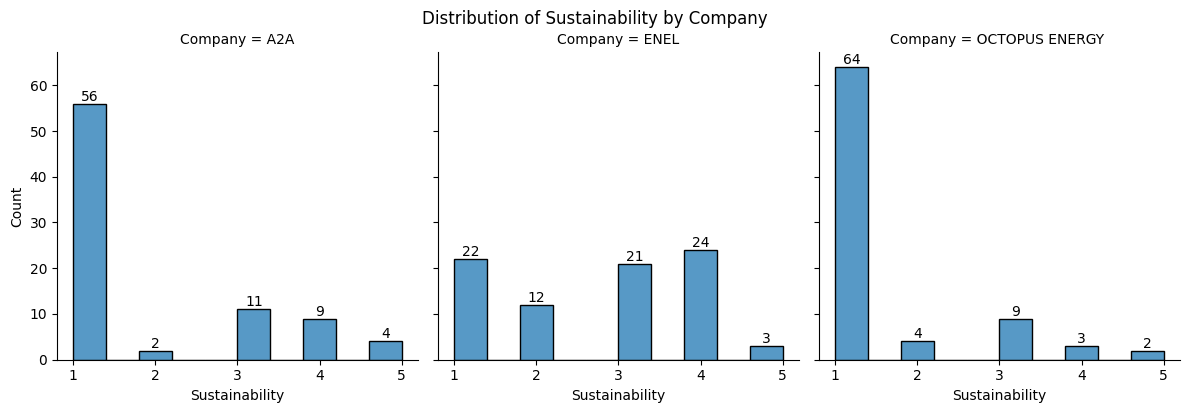

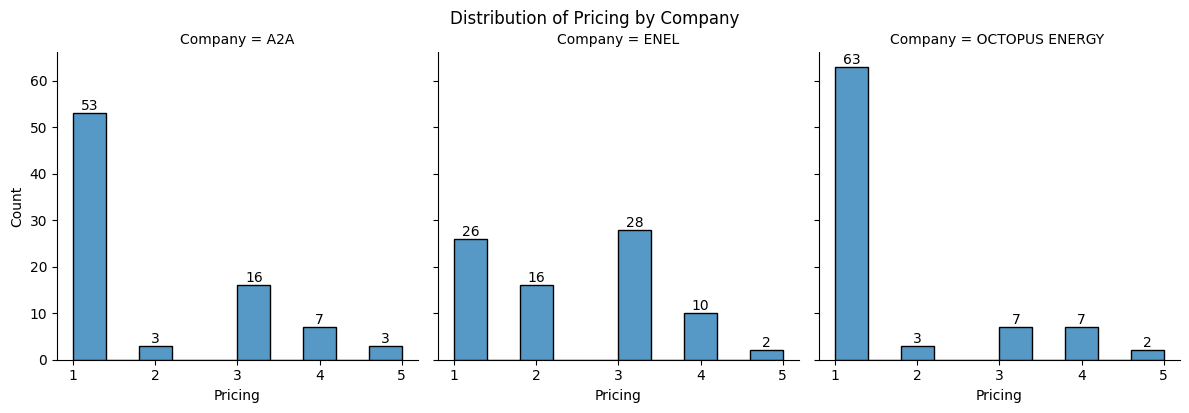

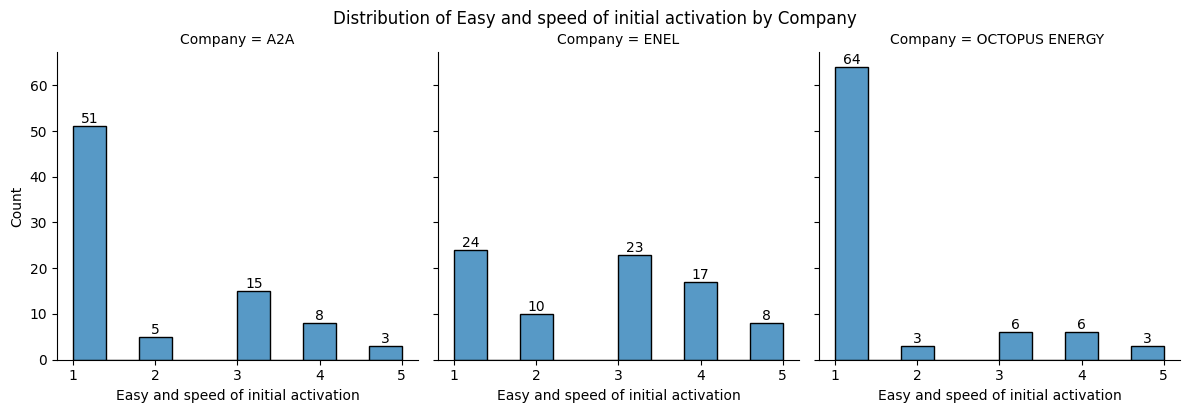

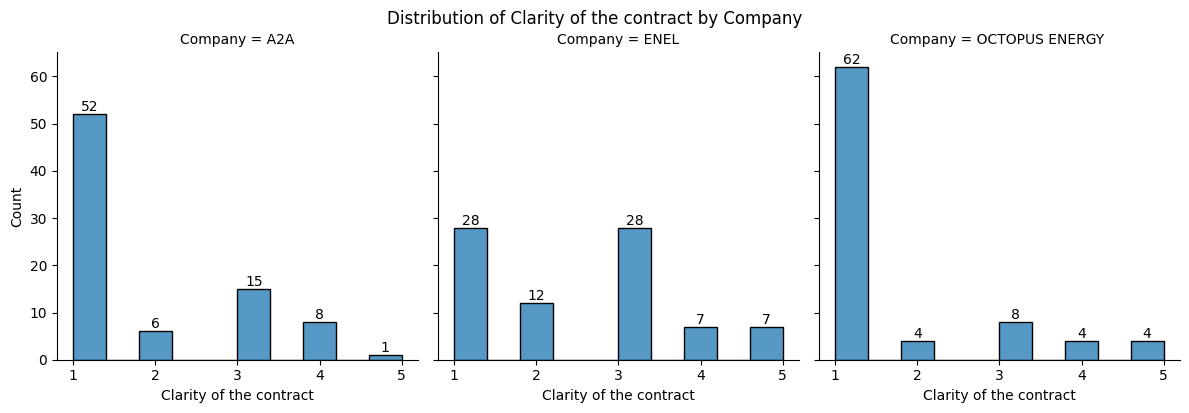

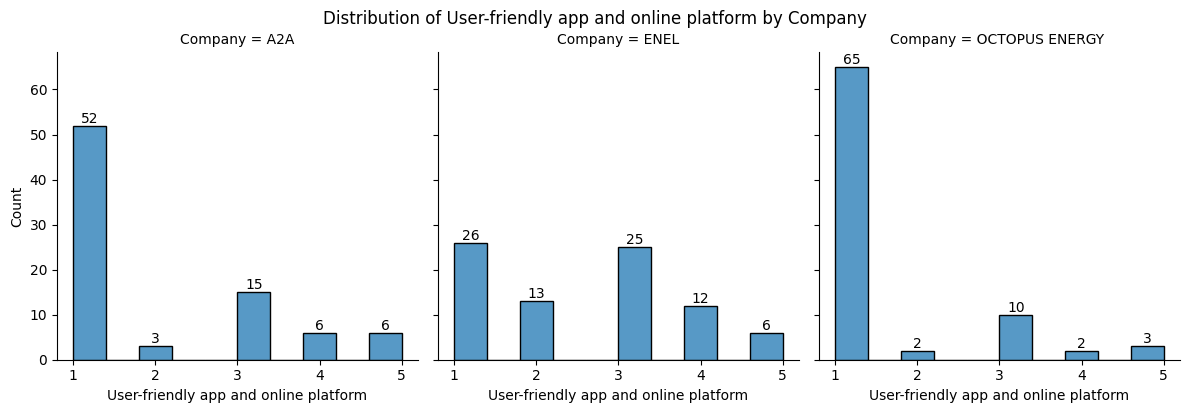

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns
columns = ["Popularity", "Sustainability", "Pricing",
           "Easy and speed of initial activation", "Clarity of the contract",
           "User-friendly app and online platform"]

# Loop through each column and create a FacetGrid for companies
for col in columns:
    g = sns.FacetGrid(df, col="Company", col_wrap=3, height=4, sharex=False)

    def plot_hist_with_labels(data, **kwargs):
        ax = sns.histplot(data, x=col, bins=10, **kwargs)
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2, height,
                        f'{int(height)}', ha='center', va='bottom', fontsize=10)

    g.map_dataframe(plot_hist_with_labels)
    g.fig.suptitle(f"Distribution of {col} by Company", y=1.02)
    plt.show()




You will see a separate histogram for each rating category across the three companies. Each chart shows how frequently each numeric score (1 through 5) occurs for that company. Notice patterns such as whether one company receives a significant number of 1 (lowest) or 5 (highest) ratings in certain categories, or if another company appears to have more balanced results across different scores. These side-by-side comparisons help highlight potential strengths (e.g., consistently higher Sustainability scores) or problem areas (e.g., large clusters of 1’s in “Clarity of the contract”) for each provider.


## 8.Computing Mean Ratings by Company

While individual rating distributions show us how scores are spread out, it's often helpful to look at average (mean) ratings to summarize overall performance by company. Here, we'll group our DataFrame by the **Company** column and compute the mean of each rating category. This view will highlight which company tends to have the highest or lowest average scores across the different dimensions such as Popularity, Pricing, or Sustainability.


In [14]:
df_mean=df.groupby("Company").aggregate({"Popularity": "mean", "Sustainability": "mean", "Pricing":"mean", "Easy and speed of initial activation":"mean",
                                "Clarity of the contract":"mean", "User-friendly app and online platform":"mean"}).reset_index()
df_mean.head()

,Company,Popularity,Sustainability,Pricing,Easy and speed of initial activation,Clarity of the contract,User-friendly app and online platform
0,A2A,2.207317,1.817073,1.829268,1.865854,1.780488,1.914634
1,ENEL,3.902439,2.682927,2.341463,2.695122,2.426829,2.500000
2,OCTOPUS ENERGY,1.463415,1.475610,1.560976,1.548780,1.585366,1.487805


You’ll see a new table (`df_mean`) where each row corresponds to a company and each column reflects the average rating for that specific category. Comparing these mean values can quickly tell you, for instance:
- Which provider has the highest overall sustainability score.
- Whether a certain company stands out in terms of “Easy and speed of initial activation.”
- If there are categories where all companies score relatively low or high on average.


## 9. Comparing Mean Scores Across Companies


Now that we have calculated the mean ratings for each company, it's time to visualize the differences across the various categories. This grouped bar chart will allow us to compare how A2A, ENEL, and OCTOPUS ENERGY perform relative to each other in terms of:

- Popularity
- Sustainability
- Pricing
- Ease and speed of initial activation
- Clarity of the contract
- User-friendly app and online platform

We will first **melt** our DataFrame (`df_mean`) into a long format to facilitate grouped plotting. Then, we will use Seaborn’s `barplot()` function to create a side-by-side comparison of mean values for each company per category.


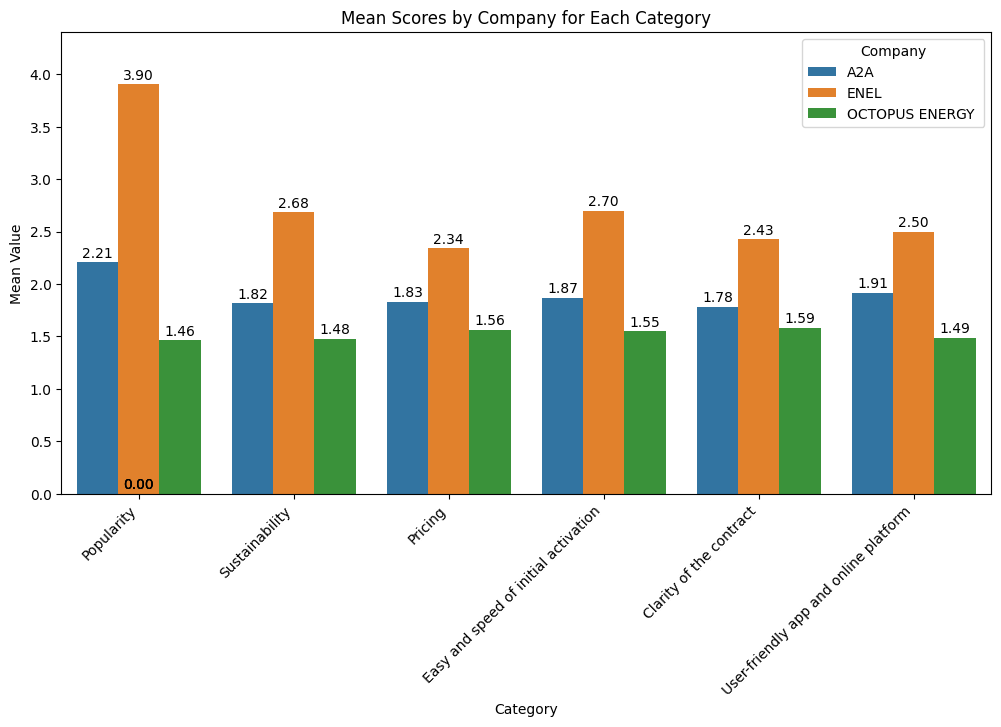

In [15]:

columns = ["Popularity", "Sustainability", "Pricing",
           "Easy and speed of initial activation", "Clarity of the contract",
           "User-friendly app and online platform"]

# Melt the dataframe for seaborn
df_melted = df_mean.melt(id_vars=["Company"], value_vars=columns, var_name="Category", value_name="Mean Value")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x="Category", y="Mean Value", hue="Company", palette="tab10")

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Avoid NaN values
        ax.text(p.get_x() + p.get_width() / 2, height + 0.02, f"{height:.2f}",
                ha="center", va="bottom", fontsize=10, color="black")

# Customize plot
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Value")
plt.title("Mean Scores by Company for Each Category")
plt.legend(title="Company")
plt.ylim(0, df_melted["Mean Value"].max() + 0.5)  # Adjust y-axis limit for better visibility
plt.show()




The resulting bar chart provides a clear visual comparison of how each company performs in different categories. Some key takeaways:

- **ENEL consistently scores the highest across all categories**, especially in **Popularity** (3.90) and **User-friendly app and online platform** (2.50).
- **A2A has moderate scores in most categories**, but struggles in areas like **Popularity (2.21)** and **Sustainability (1.82)**.
- **OCTOPUS ENERGY has the lowest ratings in almost every category**, with particularly weak **Popularity (1.46)** and **Clarity of the contract (1.59)**.

This visualization is particularly useful for identifying **which areas each company excels in or needs improvement**. If this data were for business strategy purposes, ENEL might be seen as a strong competitor, whereas OCTOPUS ENERGY might need to focus on improving its public perception and contract clarity.

---


## 10. Perceptual Mapping: Visualizing Company Positions in Key Attributes

A **perceptual map** is a great way to visually compare how companies perform relative to each other across different attributes. In this section, we will:

1. Select key attributes such as **Popularity, Sustainability, Pricing, and User-friendliness**.
2. Plot **pairwise perceptual maps** to compare company positions in a **2D space**.
3. Use scatter plots to represent each company’s mean ratings for different attributes.

This technique is particularly useful for identifying **market positioning** and understanding how companies differentiate themselves. For example:
- A company with high **Popularity but low Sustainability** might be seen as a strong brand but environmentally weak.
- A company with **high Pricing and low Ease of Activation** could be perceived as premium but inconvenient.

Let’s generate the perceptual maps.


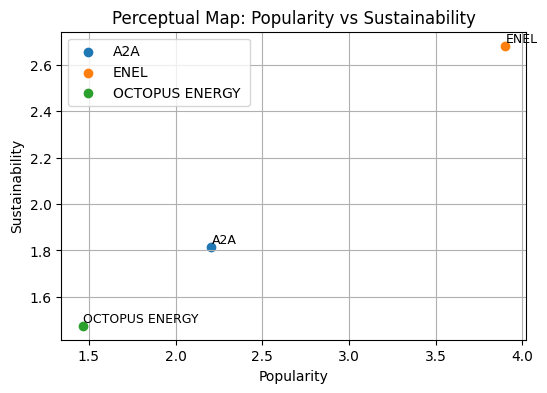

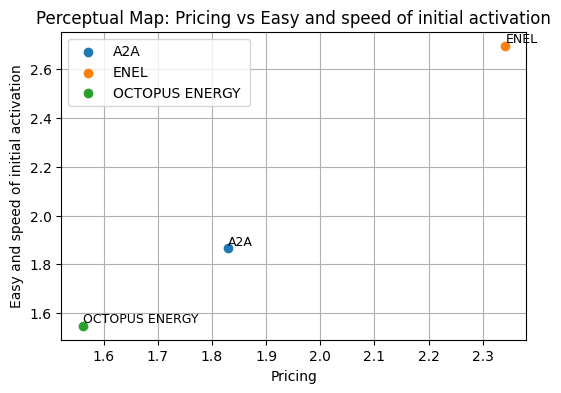

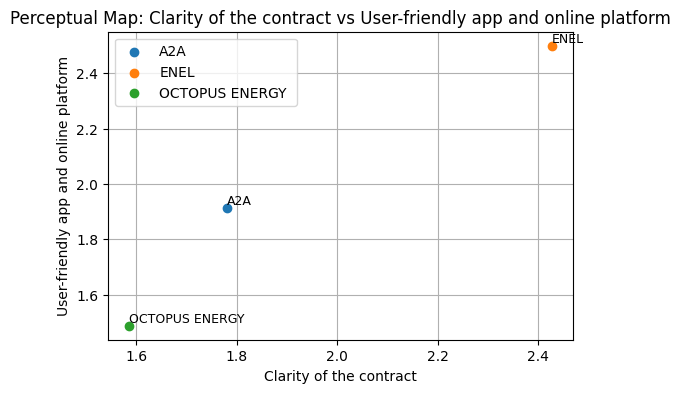

In [16]:
# Define attributes (excluding 'Company')
attributes = ["Popularity", "Sustainability", "Pricing",
              "Easy and speed of initial activation", "Clarity of the contract",
              "User-friendly app and online platform"]

# Get companies and their mean values
companies = df_mean["Company"].values
mean_vectors = df_mean[attributes].values

# Loop through pairs of attributes
for i in range(0, len(attributes) - 1, 2):
    attribute1, attribute2 = attributes[i], attributes[i + 1]
    index1, index2 = attributes.index(attribute1), attributes.index(attribute2)

    plt.figure(figsize=(6, 4))

    for company, mean_vector in zip(companies, mean_vectors):
        plt.scatter(mean_vector[index1], mean_vector[index2], label=company, marker='o')
        plt.text(mean_vector[index1], mean_vector[index2], company, fontsize=9, ha='left', va='bottom')

    # Customize plot
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.title(f'Perceptual Map: {attribute1} vs {attribute2}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Perceptual Map Analysis of Energy Companies
Our perceptual maps for the three energy companies—A2A, ENEL, and Octopus Energy—reveal some key insights into their positioning in the market.

### Pricing vs. Easy and Speed of Initial Activation
ENEL is perceived as having the best balance between pricing (2.34) and ease of activation (2.69), making it a strong contender for customers seeking convenience. A2A follows with scores of 1.83 and 1.87, indicating a more moderate offering. Octopus Energy, however, has the lowest scores (1.56 and 1.55), suggesting that customers perceive it as less competitive in both aspects.

🔹 Insight: Octopus Energy may need to improve its pricing strategy and activation process to compete with ENEL.

### Sustainability vs. Popularity
ENEL stands out as the most popular company (3.90) with the highest sustainability perception (2.68), positioning it as a leader in both awareness and environmental responsibility. A2A has moderate popularity (2.21) but lower sustainability perception (1.82), while Octopus Energy scores the lowest in both categories (1.46 and 1.48).

🔹 Insight: Octopus Energy needs to enhance its sustainability efforts and increase brand awareness to attract more customers.

### Clarity of the Contract vs. User-Friendly App and Online Platform
ENEL leads again with clarity in contracts (2.43) and a user-friendly platform (2.50). A2A lags slightly behind (1.78 and 1.91), while Octopus Energy is perceived as the least clear (1.59) and least user-friendly (1.49).

🔹 Insight: Octopus Energy should focus on improving contract transparency and enhancing its digital experience.

### Overall overview
Strengths:
✅ ENEL: Strong brand presence, high sustainability perception, Competitive pricing, and ease of activation.
✅ A2A: moderate pricing and moderate user-friendliness.
✅ Octopus Energy: Perceived as a cost-effective option but needs improvement in other areas.

### Weaknesses:
❌ A2A: Lags behind in sustainability and contract clarity.
❌ ENEL: Slightly weaker pricing perception compared to competitors.
❌ Octopus Energy: Low popularity, sustainability, and digital experience.

### Recommendations for Market Improvement
📌 A2A: Improve sustainability initiatives and clarify contract terms.
📌 ENEL: Maintain leadership by strengthening pricing competitiveness.
📌 Octopus Energy: Invest in branding, sustainability efforts, and digital platform improvements.

By addressing these areas, all three companies can enhance their market positioning and customer perception.

In [17]:
df_mean

,Company,Popularity,Sustainability,Pricing,Easy and speed of initial activation,Clarity of the contract,User-friendly app and online platform
0,A2A,2.207317,1.817073,1.829268,1.865854,1.780488,1.914634
1,ENEL,3.902439,2.682927,2.341463,2.695122,2.426829,2.500000
2,OCTOPUS ENERGY,1.463415,1.475610,1.560976,1.548780,1.585366,1.487805


### Conclusion and Final Recommendations

#### Key Takeaways from Perceptual Mapping

The perceptual maps provide valuable insights into how **A2A, ENEL, and Octopus Energy** are positioned in terms of customer perception across various attributes:

- **ENEL** emerges as the leader, with **high popularity, strong sustainability perception, and competitive pricing**. Its ease of activation and user-friendly digital services further strengthen its position.
- **A2A** holds a **moderate position**, excelling in some areas but needing improvement in **sustainability and contract clarity**.
- **Octopus Energy** is perceived as a **cost-effective option** but **lags in popularity, sustainability efforts, and digital experience**.

---

### Final Recommendations for Market Positioning

To strengthen their market presence, the companies should consider the following actions:

✅ **A2A**  
- Improve **sustainability initiatives** to match competitors.  
- Enhance **contract clarity** and simplify terms to attract more customers.  

✅ **ENEL**  
- Maintain **competitive pricing strategies** to sustain leadership.  
- Continue enhancing **digital experiences** to remain the most user-friendly provider.  

✅ **Octopus Energy**  
- Invest in **brand awareness and marketing** to boost popularity.  
- Improve **sustainability perception** and **digital service offerings** to remain competitive.  

---

By addressing these key areas, all three companies can **refine their market positioning, enhance customer satisfaction, and strengthen their competitive edge** in the energy sector.  

This concludes our **perceptual mapping analysis** of customer perception in the energy sector.  
📊🔍 **Thank you for following along!** 🚀
